In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint, History

# Directories for the augmented dataset classes
augmented_dataset_dir = r'C:\Users\kaush\Downloads\face\augmented_dataset'
rounded_double_chin_dir = os.path.join(augmented_dataset_dir, 'Rounded_Double_Chin')
tapering_triangular_dir = os.path.join(augmented_dataset_dir, 'Tapering_Triangular')
thin_angular_dir = os.path.join(augmented_dataset_dir, 'Thin_Angular')

# Parameters
img_size = (128, 128)
batch_size = 32

# Data generators for augmented dataset (training and validation split)
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    augmented_dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    augmented_dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Data generator for testing with unaugmented dataset
unaugmented_test_dir = r'C:\Users\kaush\Downloads\face\dataset'
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    unaugmented_test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Model creation using VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(3, activation='softmax')(x)  # 3 output classes

model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define the checkpoint to save the best model with .keras extension
checkpoint_path = r'C:\Users\kaush\Downloads\face\best_face_shape_vgg16_model.keras'
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',  # Monitor validation accuracy
    save_best_only=True,     # Save only the best model
    mode='max',
    verbose=1
)

# Define History to save model training history
history = History()

# Train the model with the checkpoint and history callback
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[model_checkpoint, history]
)

# Save the final model with .h5 extension after training
model.save(r'C:\Users\kaush\Downloads\face\face_shape_vgg16_model_final.h5')

# Evaluate the model on the unaugmented test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Generate classification report and confusion matrix
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

# Save the training history to a file
import pickle
history_path = r'C:\Users\kaush\Downloads\face\training_history.pkl'
with open(history_path, 'wb') as f:
    pickle.dump(history.history, f)

print("Model training, evaluation, and history saving complete.")


Found 840 images belonging to 3 classes.
Found 210 images belonging to 3 classes.
Found 117 images belonging to 3 classes.
Epoch 1/10


C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 712ms/step - accuracy: 0.3842 - loss: 1.1998
Epoch 1: val_accuracy improved from -inf to 0.51905, saving model to C:\Users\kaush\Downloads\face\best_face_shape_vgg16_model.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 26s 920ms/step - accuracy: 0.3863 - loss: 1.1954 - val_accuracy: 0.5190 - val_loss: 0.9389
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 707ms/step - accuracy: 0.6086 - loss: 0.8922
Epoch 2: val_accuracy improved from 0.51905 to 0.77619, saving model to C:\Users\kaush\Downloads\face\best_face_shape_vgg16_model.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 24s 908ms/step - accuracy: 0.6093 - loss: 0.8910 - val_accuracy: 0.7762 - val_loss: 0.7736
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 729ms/step - accuracy: 0.7390 - loss: 0.7153
Epoch 3: val_accuracy improved from 0.77619 to 0.78095, saving model to C:\Users\kaush\Downloads\face\best_face_shape_vgg16_model.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 25s 941ms/step - accuracy: 0.7400 - loss: 0.7140 - val_accuracy: 0.7810 - val_loss: 0

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 659ms/step - accuracy: 0.8612 - loss: 0.3246
Test Loss: 0.3035680949687958
Test Accuracy: 0.8717948794364929
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 684ms/step
Classification Report:
                     precision    recall  f1-score   support

Rounded_Double_Chin       0.90      1.00      0.95         9
Tapering_Triangular       1.00      0.81      0.89        77
       Thin_Angular       0.69      1.00      0.82        31

           accuracy                           0.87       117
          macro avg       0.86      0.94      0.89       117
       weighted avg       0.91      0.87      0.88       117

Confusion Matrix:
[[ 9  0  0]
 [ 1 62 14]
 [ 0  0 31]]
Model training, evaluation, and history saving complete.


Found 840 images belonging to 3 classes.
Found 210 images belonging to 3 classes.
Found 117 images belonging to 3 classes.
Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 715ms/step - accuracy: 0.3756 - loss: 1.2970
Epoch 1: val_accuracy improved from -inf to 0.63810, saving model to C:\Users\kaush\Downloads\face\best_face_shape_vgg16_model.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 26s 930ms/step - accuracy: 0.3777 - loss: 1.2914 - val_accuracy: 0.6381 - val_loss: 0.9153
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 714ms/step - accuracy: 0.6221 - loss: 0.8636
Epoch 2: val_accuracy improved from 0.63810 to 0.74762, saving model to C:\Users\kaush\Downloads\face\best_face_shape_vgg16_model.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 25s 914ms/step - accuracy: 0.6226 - loss: 0.8630 - val_accuracy: 0.7476 - val_loss: 0.7829
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 743ms/step - accuracy: 0.7638 - loss: 0.7091
Epoch 3: val_accuracy improved from 0.74762 to 0.77143, saving model to C:\Users\kaush\Downloads\face\best_face_sh

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 654ms/step - accuracy: 0.9514 - loss: 0.1834
Test Loss: 0.19000709056854248
Test Accuracy: 0.9487179517745972
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 709ms/step
Classification Report:
                     precision    recall  f1-score   support

Rounded_Double_Chin       0.90      1.00      0.95         9
Tapering_Triangular       0.99      0.94      0.96        77
       Thin_Angular       0.88      0.97      0.92        31

           accuracy                           0.95       117
          macro avg       0.92      0.97      0.94       117
       weighted avg       0.95      0.95      0.95       117

Confusion Matrix:
[[ 9  0  0]
 [ 1 72  4]
 [ 0  1 30]]


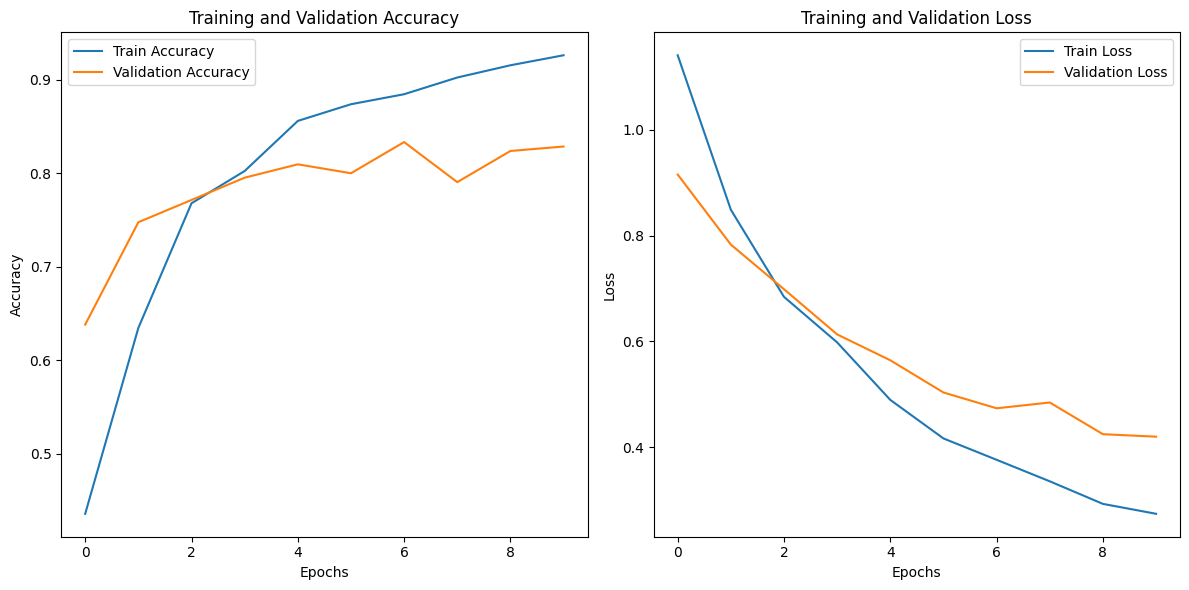

Model training, evaluation, and history saving complete.


In [3]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint, History
import matplotlib.pyplot as plt
import pickle

# Directories for the augmented dataset classes
augmented_dataset_dir = r'C:\Users\kaush\Downloads\face\augmented_dataset'
rounded_double_chin_dir = os.path.join(augmented_dataset_dir, 'Rounded_Double_Chin')
tapering_triangular_dir = os.path.join(augmented_dataset_dir, 'Tapering_Triangular')
thin_angular_dir = os.path.join(augmented_dataset_dir, 'Thin_Angular')

# Parameters
img_size = (128, 128)
batch_size = 32

# Data generators for augmented dataset (training and validation split)
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    augmented_dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    augmented_dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Data generator for testing with unaugmented dataset
unaugmented_test_dir = r'C:\Users\kaush\Downloads\face\dataset'
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    unaugmented_test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Model creation using VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(3, activation='softmax')(x)  # 3 output classes

model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define the checkpoint to save the best model with .keras extension
checkpoint_path = r'C:\Users\kaush\Downloads\face\best_face_shape_vgg16_model.keras'
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',  # Monitor validation accuracy
    save_best_only=True,     # Save only the best model
    mode='max',
    verbose=1
)

# Define History to save model training history
history = History()

# Train the model with the checkpoint and history callback
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[model_checkpoint, history]
)

# Save the final model with .h5 extension after training
model.save(r'C:\Users\kaush\Downloads\face\face_shape_vgg16_model_final.h5')

# Evaluate the model on the unaugmented test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Generate classification report and confusion matrix
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

# Save the training history to a file
history_path = r'C:\Users\kaush\Downloads\face\training_history.pkl'
with open(history_path, 'wb') as f:
    pickle.dump(history.history, f)

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

print("Model training, evaluation, and history saving complete.")


In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and f1-score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Print the results
print(f"Overall Precision = {precision * 100:.2f}")
print(f"Overall Recall = {recall * 100:.2f}")
print(f"Overall F1-score = {f1 * 100:.2f}")


Overall Precision = 95.21
Overall Recall = 94.87
Overall F1-score = 94.92
